# **Erklärskript zur ersten Benutzung der Python-Bibliothek prettymaps**

# Voraussetzungen

Die Karten können auch ohne große Programmierkenntnisse erstellt werden. Ich habe versucht deutlich zu machen, welche zwei Codezeilen angepasst werden müssen, um schnell eigene Karten zu erstellen. In dem Karten-Script wird die Programmiersprache Python verwendet. Als Tool um an die Daten für die Karte zu kommen, wird Open Street Maps benutzt. Je mehr man über beides weiß, je einfacher wird das individuelle Anpassen der Karte. Für ein tieferes Verständnis des Codes lohnt es sich, sich bezüglich Python die Datenstruktur [Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) (Lexikon) und den Aufbau von [Funktionen](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) anzusehen. Open Street Map arbeitet bezüglich der Geobjekte mit [keys und values](https://wiki.openstreetmap.org/wiki/Map_features). Auch da lohnt es sich, sich einzulesen. Dieses Wissen ist aber, wie gesagt nicht, unbedingt nötig.

# Kurze Einführung

In diesem Script werfen wir einen Blick auf die Features und Funktionalitäten der Bibliothek [prettymaps](https://github.com/marceloprates/prettymaps) von marceloprates. Kurz gesagt dient die Bibliothek dazu, [Open Street Map Daten](https://www.openstreetmap.org/) farblich zu visualisieren. Die geographische Basisdaten werden von Open Street Map herunter geladen, Eigenschaften dieser Daten individuell angepasst, eingefärbt und schließlich als Grafik (Karte) gespeichert. Das lässt sich grob in drei Schritten zusammenfassen, die dem Verständnis dienen, aber nicht zwangsläufig linear dem Aufbau des Scripts folgen: 

`Download Open Street Map Data als geografische Objekte (durch prettymaps automatisiert) > Erstellen/Anpassen der Karte -> Speichern der Karte` 

Um die Bedienung so einfach wie möglich zu machen, lassen sich alle Beispiele direkt in diesem Skript ausführen. Falls noch nicht geschehen, muss dieses Skript über den Menü-Reiter `Datei -> Kopie in Drive speichern` auf euren eigenen Speicherplatz kopiert werden, um es auszuführen zu können.

P.S. Weitere Anpassungen und Versionen der Karte werden aus Zeitgründen erstmal ausgespart. Hier findet ihr die Basisversion der Karten zum grundsätzlichen Verständnis.


### !!! Die folgenden zwei Code-Blocks dienen zur Installation und Import der Bibliothek. Sie müssen nach dem Kopieren des Scripts auf den eigenen Google Drive ausgeführt werden. Das geschieht über den "Ausführen"-Pfeil auf der linken Seite des Code oder der Tastenkombination "Shift + Enter". !!!
---------------------------

### Installation der prettymaps-Bibliothek, Installation der kompatiblen matplotlib-Bibliothek

In [1]:
!pip install git+https://github.com/marceloprates/prettymaps.git
!pip install matplotlib==3.1.3


  Cloning https://github.com/marceloprates/prettymaps.git to /tmp/pip-req-build-wzk1kwgy
  Running command git clone -q https://github.com/marceloprates/prettymaps.git /tmp/pip-req-build-wzk1kwgy
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Created wheel for prettymaps: filename=prettymaps-1.0.0-py3-none-any.whl size=12151 sha256=146b130ae9fa8d2a26fcc15ad251cf1cadbd6737beab8488e50c7f73dc621d94
  Stored in directory: /tmp/pip-ephem-wheel-cache-t0j00lgt/wheels/fa/9e/a3/b4ac257806562dc8bce02411bfda983979daea26f04986a000
Successfully built prettymaps
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
ERROR: osmnx 1.0.1 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
  Attempting uninstall: matplotlib
    Found existing installation

### Import der notwendigen Bibliotheken in das Script

In [2]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

#import prettymaps, matplotlib and google.colab files
from prettymaps import *
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt


/home/tim/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


-----------------------------------------


# Erstellen/Anpassen der Karte: Wir färben das Brandenburger Tor ein

Jeder Programmier-Code sieht am Anfang immer kryptisch aus. Das ist ganz normal, denn Programmieren ist eine eigene Sprache, die erst erlernt werden muss. Der Prozess der Kartenerstellung (Customize) folgt folgender Struktur: 

**Festlegen der Kartendimensionen -> Import der OSM-Objekte, die auf der Karte erscheinen sollen -> Individuelle Kolorierung der OSM-Objekte**

Ich kommentiere zunächst ein Codebeispiel zur schnellen Übersicht, im Anschluss gibts dann mehr Infos zu den einzelnen Parametern des Codes.




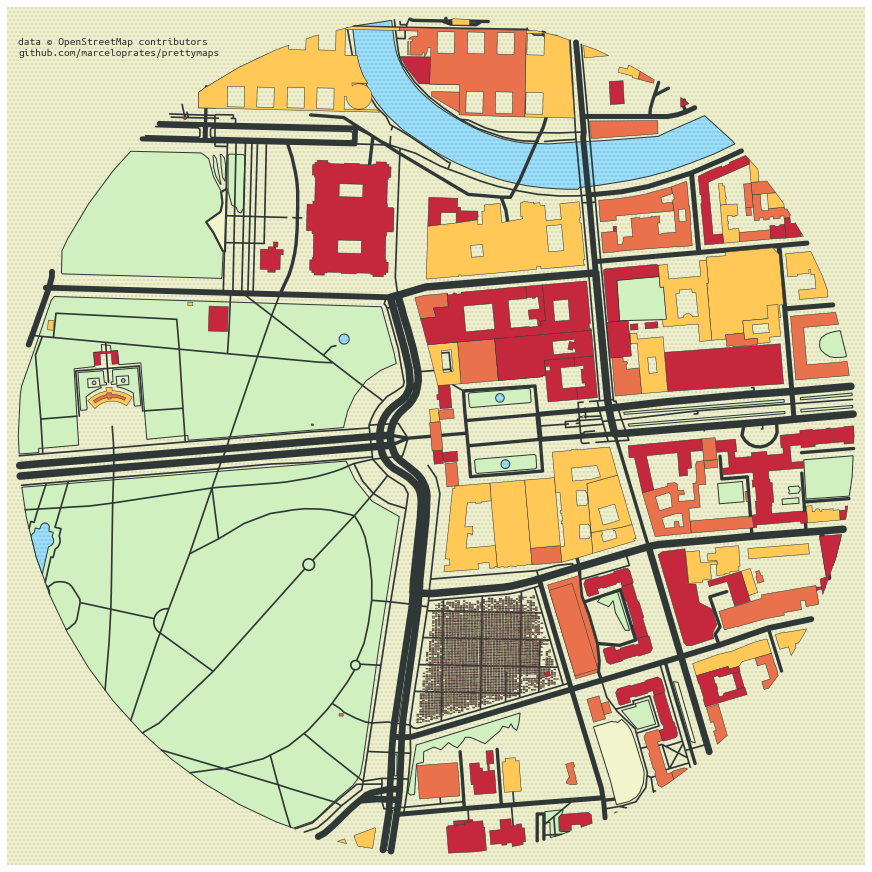

In [3]:
# legt die Größe der Karte (plot) fest; constrained_layout sorgt dafür, alle Elemente auf die Karte zu bekommen     
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

# plot() ist die Funktion, die die Karte/plot erstellt
colored_map = plot(
    # Hier wird der Ort festgelegt, der auf der Karte erscheinen soll. Jede Open Street Map-taugliche Adresse kann angegeben werden. Beispiel: Brandenburger Tor.
    # Alternativ kann man aber auch Latitude und Longitude eines Orts in Klammern angeben,beim Brandenburger Tor wäre das (52.516272, 13.377722)
    "Brandenburger Tor, Pariser Platz, 10117 Berlin", # oder (52.516272, 13.377722)
    # Der Radius der Karte kann frei als Zahl gewählt werden, beispielsweise 40 oder 3000
    radius = 500,
    # Die schon vorher festgelegte Größe der Achse wird hier übernommen, es ist keine weitere Bearbeitung nötig
    ax = ax,
    # mit dem dictionary ("Lexikon") "layers = {}" legt man fest, welche geografischen Mermale, in OSM-lingo "keys", auf die Karte übernommen werden 
    layers = {
            # perimeter bedeutet Umfang. Hier ist vermutlich der Raum der Karte außerhalb der Geoobjekte gemeint, also der Umkreis außen. 
            'perimeter': {},
            # "streets{}" filtert und importiert verschiedenste Straßentypen
            'streets': {
                # nicht alle Straßentypen werden in die Karte übernommen, sondern nur die mit dem Merkmal/key "highway", hier im Filter angegeben werden
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                # Mit "width{}" kann man anpassen, wie breit die Straßen auf der Karte dargestellt werden sollen. 
                'width': {
                    # Bei den folgenden Straßen-Typen handelt es sich um die vorher gefilterten Daten. Die Zahl legt die Breite des Straßentyps fest.
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            # Neben den Straßen-Ebenen (layers) kann man nach Belieben noch weitere hinzufügen. 
            # Sie folgen dem Schema 'object-description': 'tags':{'OSM-key':'OSM-value'}}
            # Die hier verwendeten Ebenen können weitere hinzugefügt oder theoretisch ganz weggelassen werden (was komisch aussähe, aber funktioniert)
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        # An dieser Stelle beginnt mit "drawing_kwargs = {}" das Einfärben der importieren Open Street Map Elemente. 
        # Wir können nur die Layer kolorieren, die zuvor für die Karte importiert wurden
        drawing_kwargs = { 
            # Bei den sog. values wie '#F2F4CB'handelt es sich um hexadezimale Farbdefinition
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            # 'fc' bedeutet facecolor, also die (Haupt-)Farbe des geografischen Objekts               
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            # 'lw' meint linewidth, die Breite der Linie
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            # 'ec' bedeutet edgecolor, die Farbe am Rand des Objects,
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            # 'hatch' beschreibt das Muster auf dem Object (hier die Punkte 'ooo...')
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            # 'zorder bezeichnet die Reihenfolge, in der Objekte auf der Karte dargestellt werden
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            # 'palette' gibt eine ganze Farbpalette für ein Objekt vor, als Liste in []
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },
        # Das Quellen-Attribut ist Standard bei Open Street Maps. AUch dem sog. "credit" kann eine individuelle Farbe zugewiesen werden
        osm_credit = {'color': '#2F3737'}
)

# Die fertige Karte kann nun abschließend in verschiedenen Karten gespeichert werden. 
# Dauert der Render-Prozess beim Testen zu lange, sollte der Radius-Parameter 'radius = 500' deutlich verkleinert werden
plt.savefig('prints/brandenburger_tor.png')
plt.savefig('prints/brandenburger_tor.svg')
plt.savefig('prints/brandenburger_tor.jpg')

# Welche Aufgabe erfüllen die einzelnen Code-Zeilen? Die Reihenfolge der Funktionen folgt dem Script

`fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = False)`

Legt den Rahmen (Dimensionen) für die Karte fest und sorgt für die Platzierung der Elemente. Die Dimensionen des Rahmens können leicht geändert werden. Ein Beispiel: `fig, ax = plt.subplots(figsize = (20, 10), constrained_layout = False)`

`layers = plot()` 

Erstellt den Plot, bzw. die Karte. Innerhalb dieser Funktion lassen sich wiederum verschiedene Parameter festlegen, die das Design der Karte verändern. Gehen wir die Parameter mal durch, die Parameter werden jeweils durch ein Komma abgetrennt:

`"Brandenburger Tor, Pariser Platz, 10117 Berlin"` 

Legt den geographischen Mittelpunkt der Karte fest. Verwendet werden können alle Orte aus Open Street Maps (also der Welt), sowohl als Adressen als auch Geokoordinaten wie `"(52.516272, 13.377722)"`.

`radius = 1000`

 Legt den Radius der Karte ab dem vorher bestimmten Ort fest (vermutlich in Meilen?). Um Zeit beim Rendern der Karte zu sparen, können auch geringe Distanzen verwendet werden. Beispiel: `radius = 200` 

`ax = ax` 

Die Achsen der Karte wurden bereits über die Codezeile `fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = False)` vorgegeben und werden hier nur in den Plot/die Kate übernommen.

`layers = {}`

Fast jede Karte besteht aus mehren Schichten, die nebeneinander und übereinander gelegt werden. Bei Open Street Maps kann man sich das so vorstellen, dass zum Beispiel erst  erst die Autobahnen hinzugefügt werden, dann Baumregion, dann die Häuser, etc. Wichtig ist eigentlich nur zu wissen, dass es verschiedene Schichten ("layer") gibt, die zur Karte hinzugefügt werden können.

`layers = {'perimeter': {}}`

Der Leerraum außerhalb der eigentlichen Geobjekte, der sich um die eigentliche Kartenmitte mit Häusern, Bäumen etc. legt (aber immer noch dazu gehört).

`layers = {'streets': {}'`

Über dieses dictionary wählen wir aus, welche Straßentypen aus Open Street Maps überhaupt importiert werden `'custom_filter':{}` und wie breit diese auf der Karte dargestellt werden solen  `'width': {}`.

`building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False}`

Jederzeit können weitere Ebenen der Karte hinzugefügt werden. Die Semantik der Zeile wirkt nicht unbedingt eingängig, wird aber nach dem Lesen des Artikels https://wiki.openstreetmap.org/wiki/Map_features verständlicher. Sie folgen dem Schema 

`'object-description': 'tags':{'OSM-key':'OSM-value'}}` 

OSM-key und OSM-value lassen sich einfach der Open Street Map Seite entnehmen.

`osm_credit = {'color': '#2F3737'}`

Dieses dictionary gehört schon nicht mehr zum Bearbeitungsschritt der geographischen Objekte, sondern fügt dem credit auf der Karte, also dem Open Street Map-Attribut oder der Quellenangabe, eine Farbe hinzu.

`drawing_kwargs = {}`

Der Prozess des individuellen Einfärbens der Geoobjekte geschieht hier. Die Farben werden über Hexwerte wie `'#F2F4CB'` gesteuert.

`plt.savefig('../prints/brandenburger_tor.png')`

Die Funktion `plt.savefig()` gehört zur Python-Library matplotlib und sort nur für die Speicherung der Karte als Grafik in einem beliebigen Bild-Format.

`files.download('../prints/brandenburger_tor.svg')`

Mit dieser Funktion kann die Grafik mit dem Browser automatisch herunter geladen werden. Name und Pfad der Datei sollten mit dem vorherigen Speicherort identisch sein.


# Minimalvariation mit anderem Ort und Radius (Elbphilharmonie, Hamburg)

Als Beispiel wie man den Ort und Radius und Download-Name der Karte ändert, habe ich die Elbphilharmonie in Hamburg ausgewählt. Der Rest des Codes bleibt komplett gleich, um die Unteschiede verdeutlichen.

/home/tim/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


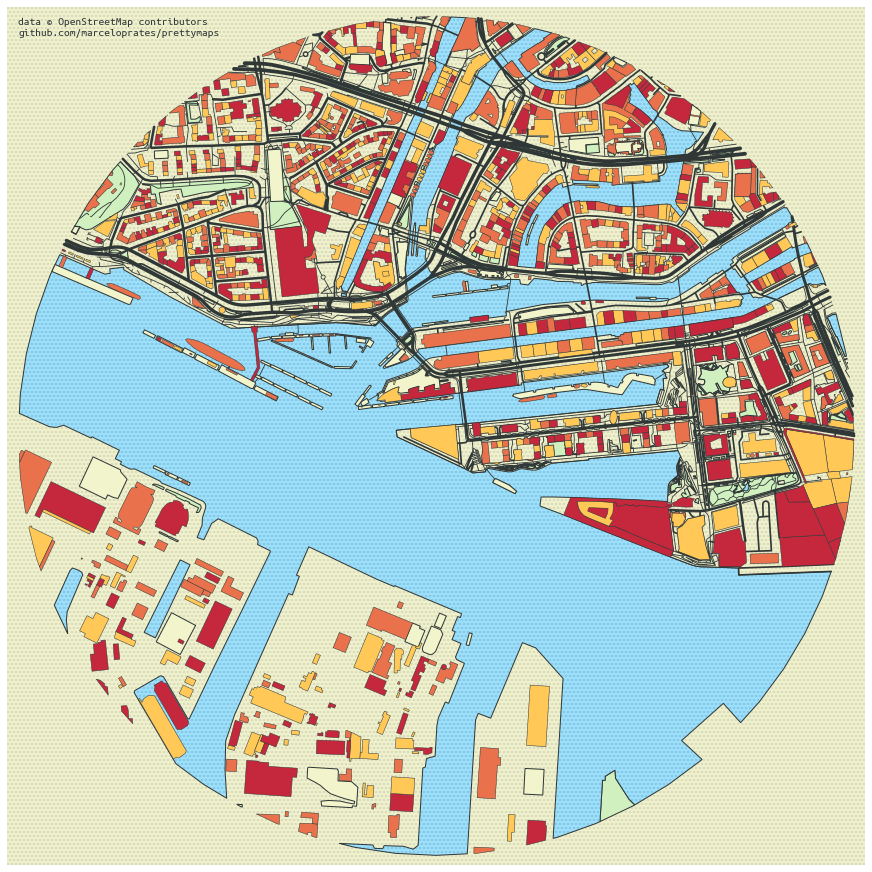

In [4]:
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

# Wir verändern ausschließlich den dargestellten Ort, Radius und speichern die Karte unter anderem Namen

colored_map = plot(
    # Hier wird der Ort festgelegt, der auf der Karte erscheinen soll. Hier die Elbphilharmonie in Hamburg
    (53.541389, 9.984167), 
    # Wir ändern den Radius der Karte, von 500 auf 1000
    radius = 1000,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = { 
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},            
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },
        osm_credit = {'color': '#2F3737'}
)

# Wir ändern den Namen der Karte in "Elbphilharmonie"
plt.savefig('prints/Elbphilharmonie.png')
plt.savefig('prints/Elbphilharmonie.svg')
plt.savefig('prints/Elbphilharmonie.jpg')

# Schön und gut, aber wie erstelle ich eine eckige Karte und füge Text hinzu?

Das Format des OSM-Teils der Karte kann ganz einfach in ein eckiges Format geändert werden. Dazu müssen dem dictionary `layers = {}` nur der key/value `'circle': False'` hinzugefügt werden. 

Das Hinzufügen von Text ist ein kleinwenig komplizierter, es funktioniert über das Festlegen der Kartendimensionen und der  Funktion `ax.text()`. Sehen wir uns erst den Code an. (Code sollte nicht ausgeführt werden, dient nur der Erklärung.)


In [5]:
# ax.text(
    # Die Dimensionen der Karte werden über x- und y-Werte festgelegt.
        # xmin, ymin, xmax, ymax = layers['perimeter'].bounds
        # x, dy = xmax-xmin, ymax-ymin
    # Der X-. bzw. Y-Minimumwert der Karte dient als Ausgangspunkt, um von dort den Text auszurichten
        # xmin+.39*dx, ymin+.305*dy,
    # Der Text, der auf der Karte erscheinen soll
        #' '*3 + 'Hamburger Elbphilharmonie',
    # Wie soll der Text eingefärbt werden?
        # color = '#2F3737',
    # Sorgt dafür, dass der Text an 6. Stelle gerendert/erstellt wird
        # zorder = 6, 
    # Soll die Schrift rotiert werden, wenn ja um wie viel Grad?
        # rotation = +1.75,
    # Ganz am Anfang des Skripts wurde in den Order "assets/" eine eigene Schriftart importiert. Wir nutzen sie an dieser Stelle und legen die Größe fest
        # fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 24)
)

/home/tim/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: unmatched ')' (<ipython-input-5-e9e5c9cf870a>, line 17)

/home/tim/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


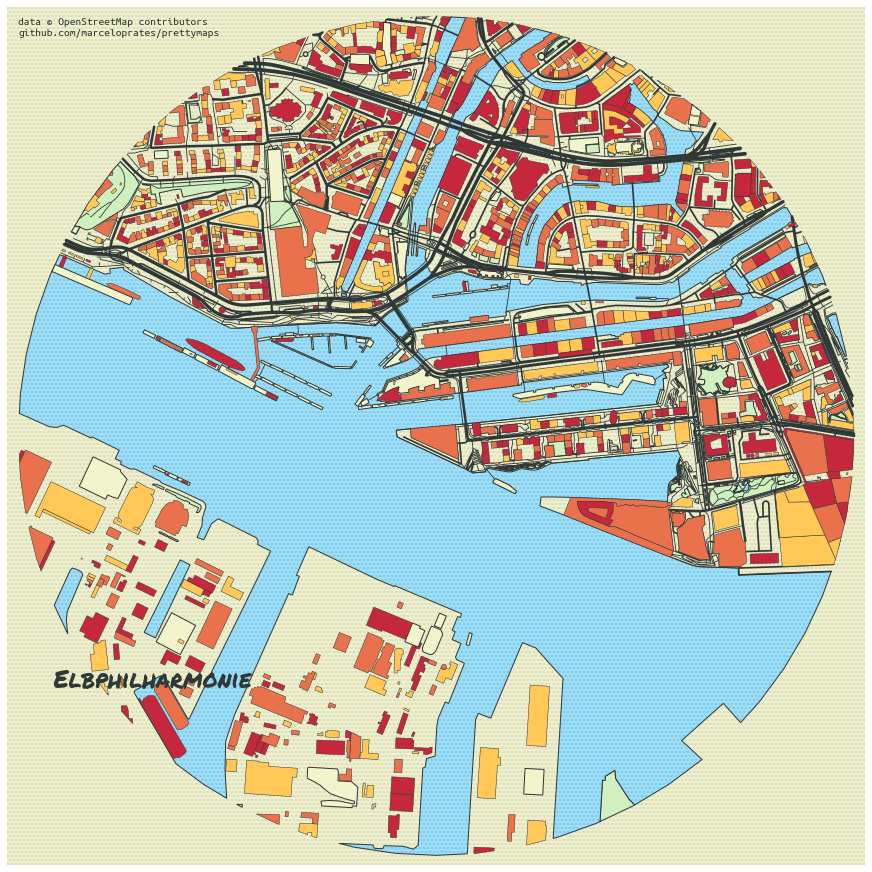

In [7]:
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

# Wir verändern ausschließlich den dargestellten Ort, Radius und speichern die Karte unter anderem Namen

colored_map = plot(
    # Hier wird der Ort festgelegt, der auf der Karte erscheinen soll. Hier die Elbphilharmonie in Hamburg
    (53.541389, 9.984167), 
    # Wir ändern den Radius der Karte, von 500 auf 1000
    radius = 1000,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = { 
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},            
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},

        # der Karte Ecken verleihen
        'circle': False,

        },

        osm_credit = {'color': '#2F3737'}
)

# Die Dimensionen der Karte speichern, um anhand derer die Position des Textes berechnen zu können
xmin, ymin, xmax, ymax = colored_map['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin

ax.text(
    xmin+.01*dx, ymin+.20*dy,
    ' '*3 + 'Elbphilharmonie',
    color = '#2F3737',
    zorder = 6, 
    fontproperties = fm.FontProperties(fname = 'assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 24)
)

plt.savefig('prints/Elbphilharmonie_kanten_text.png')
plt.savefig('prints/Elbphilharmonie_kanten_text.svg')
plt.savefig('prints/Elbphilharmonie_kanten_text.jpg')

# Weitere Anpassungsmöglichkeiten der Karte

Die hier vorgestellten Karten sind nur der Anfang, es lassen sich noch viele weitere Einstellungen und Variationen vornehmen. Einige Beispiele finden sich in diesem Skript:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marceloprates/prettymaps/blob/master/notebooks/examples.ipynb)